# Analysis of Technology Stocks' Performance on 18th April 2019
Source: Yahoo! Finance


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tech_stocks = pd.read_csv('yahoofin.csv', index_col = 'symbol')

A peek at the data:

In [3]:
tech_stocks.head()

beta_3y_mthly  change market_cap                            name  \
symbol                                                                     
AAPL             0.91    0.73   961.257B                      Apple Inc.   
TXN              1.12   -0.09    108.42B  Texas Instruments Incorporated   
NVDA             2.37   -0.99   113.362B              NVIDIA Corporation   
ACN              1.14   -0.34   113.923B                   Accenture plc   
CRM              1.05    0.65   120.873B            salesforce.com, inc.   

       one_yr_target_est  pe_ratio perc_change   price   volume  \
symbol                                                            
AAPL              193.12     16.82      +0.36%  203.86  24.196M   
TXN               109.32     20.65      -0.08%  115.51   4.196M   
NVDA              183.19     28.10      -0.53%  186.30   9.525M   
ACN               183.52     25.99      -0.19%  178.61   1.279M   
CRM               181.63    109.08      +0.42%  155.99     4.2M   

       volume_3_mth_avg  
symbol                   
AAPL            28.307M  
TXN              5.499M  
NVDA            15.613M  
ACN              1.976M  
CRM              5.305M

Reordering columns:

In [4]:
tech_stocks = tech_stocks[['name', 'price', 'change', 'perc_change', 'volume', 'volume_3_mth_avg', 'market_cap', 'pe_ratio', 'beta_3y_mthly', 'one_yr_target_est']]

In [5]:
tech_stocks.head(10)

name   price  change  \
symbol                                                                
AAPL                                     Apple Inc.  203.86    0.73   
TXN                  Texas Instruments Incorporated  115.51   -0.09   
NVDA                             NVIDIA Corporation  186.30   -0.99   
ACN                                   Accenture plc  178.61   -0.34   
CRM                            salesforce.com, inc.  155.99    0.65   
IBM     International Business Machines Corporation  140.33    1.22   
AVGO                                  Broadcom Inc.  318.62   -1.91   
ADBE                                     Adobe Inc.  270.57    1.12   
SAP                                          SAP SE  112.97    0.66   
ORCL                             Oracle Corporation   54.52    0.04   

       perc_change   volume volume_3_mth_avg market_cap  pe_ratio  \
symbol                                                              
AAPL        +0.36%  24.196M          28.307M   961.257B     16.82   
TXN         -0.08%   4.196M           5.499M    108.42B     20.65   
NVDA        -0.53%   9.525M          15.613M   113.362B     28.10   
ACN         -0.19%   1.279M           1.976M   113.923B     25.99   
CRM         +0.42%     4.2M           5.305M   120.873B    109.08   
IBM         +0.88%   4.705M           4.254M   124.875B     14.77   
AVGO        -0.60%   2.655M           2.694M   126.124B     21.04   
ADBE        +0.42%   2.029M           2.871M   132.025B     50.20   
SAP         +0.59%  481,087          722,966   135.003B     27.29   
ORCL        +0.07%   8.021M          14.265M    186.33B     19.53   

        beta_3y_mthly one_yr_target_est  
symbol                                   
AAPL             0.91            193.12  
TXN              1.12            109.32  
NVDA             2.37            183.19  
ACN              1.14            183.52  
CRM              1.05            181.63  
IBM              1.68            143.72  
AVGO             0.27            312.45  
ADBE             1.03            292.67  
SAP              0.86            122.47  
ORCL             1.04             53.07

In [6]:
tech_stocks.shape

(467, 10)

There are 467 stocks. Performance is captured on 9 variables excluding name.

In [7]:
tech_stocks.dtypes

name                  object
price                 object
change               float64
perc_change           object
volume                object
volume_3_mth_avg      object
market_cap            object
pe_ratio             float64
beta_3y_mthly        float64
one_yr_target_est     object
dtype: object

### Converting strings values into float:

In [8]:
tech_stocks.price = tech_stocks.price.str.replace(',', '').astype(float)

In [9]:
tech_stocks.perc_change = tech_stocks.perc_change.str.replace('%', '').astype(float)

In [10]:
tech_stocks.volume = tech_stocks.volume.str.replace(',', '')
tech_stocks.volume = [float(x.replace('M', ''))*1000000 if 'M' in x else float(x) for x in tech_stocks.volume]

Some columns have a mix of M (for mn), B (for bn) and normal values. Bringing them into same denomination.

In [11]:
tech_stocks.volume_3_mth_avg = tech_stocks.volume_3_mth_avg.str.replace(',', '')
tech_stocks.volume_3_mth_avg = [float(x.replace('M', ''))*1000000 if 'M' in x else float(x) for x in tech_stocks.volume_3_mth_avg]

In [12]:
tech_stocks.market_cap = tech_stocks.market_cap.str.replace(',', '')
tech_stocks.market_cap = [float(x.replace('M', ''))*1000000 if 'M' in x else float(x.replace('B', ''))*1000000000 if 'B' in x else float(x) for x in tech_stocks.market_cap]

In [13]:
tech_stocks.one_yr_target_est = tech_stocks.one_yr_target_est.str.replace(',', '').astype(float)

In [14]:
tech_stocks.sample(10)

name   price  change  perc_change  \
symbol                                                                 
WDC         Western Digital Corporation   55.39    0.94         1.73   
MRCY              Mercury Systems, Inc.   67.25    0.55         0.82   
DAKT                   Daktronics, Inc.    7.57    0.01         0.13   
ATHM                      Autohome Inc.  113.26    1.12         1.00   
BCOV                    Brightcove Inc.    8.39    0.09         1.08   
AVGO                      Broadcom Inc.  318.62   -1.91        -0.60   
SINA                   SINA Corporation   65.11    0.37         0.57   
RNG                   RingCentral, Inc.  105.50    1.29         1.24   
DSGX    The Descartes Systems Group Inc   37.71   -0.06        -0.16   
AAPL                         Apple Inc.  203.86    0.73         0.36   

            volume  volume_3_mth_avg    market_cap  pe_ratio  beta_3y_mthly  \
symbol                                                                        
WDC      5652000.0         7160000.0  1.611000e+10     20.26           1.72   
MRCY      152648.0          335075.0  3.259000e+09     94.72           1.58   
DAKT       69826.0          132095.0  3.407450e+08     57.79           0.90   
ATHM      745408.0         1029000.0  1.340800e+10     34.34           0.89   
BCOV       68437.0          114775.0  3.174300e+08       NaN           0.25   
AVGO     2655000.0         2694000.0  1.261240e+11     21.04           0.27   
SINA      415795.0          794012.0  4.653000e+09     38.30           1.30   
RNG       785068.0          842254.0  8.635000e+09       NaN           1.30   
DSGX       61969.0          112587.0  2.907000e+09     94.27           1.09   
AAPL    24196000.0        28307000.0  9.612570e+11     16.82           0.91   

        one_yr_target_est  
symbol                     
WDC                 58.52  
MRCY                60.88  
DAKT                 9.50  
ATHM                97.66  
BCOV                12.25  
AVGO               312.45  
SINA                80.79  
RNG                115.47  
DSGX                38.74  
AAPL               193.12

### Sanity check of conversions

In [15]:
# Confirming if all data types are as required
tech_stocks.dtypes

name                  object
price                float64
change               float64
perc_change          float64
volume               float64
volume_3_mth_avg     float64
market_cap           float64
pe_ratio             float64
beta_3y_mthly        float64
one_yr_target_est    float64
dtype: object

In [16]:
print(tech_stocks.volume[tech_stocks.index == 'SAP'])
print(tech_stocks.volume[tech_stocks.index == 'IBM'])

symbol
SAP    481087.0
Name: volume, dtype: float64
symbol
IBM    4705000.0
Name: volume, dtype: float64


In [17]:
print(tech_stocks.volume_3_mth_avg[tech_stocks.index == 'FTV-PA'])
print(tech_stocks.volume_3_mth_avg[tech_stocks.index == 'NXPI'])

symbol
FTV-PA    9215.0
Name: volume_3_mth_avg, dtype: float64
symbol
NXPI    3779000.0
Name: volume_3_mth_avg, dtype: float64


In [18]:
print(tech_stocks.market_cap[tech_stocks.index == 'MINDP'])
print(tech_stocks.market_cap[tech_stocks.index == 'AAPL'])

symbol
MINDP    46660000.0
Name: market_cap, dtype: float64
symbol
AAPL    9.612570e+11
Name: market_cap, dtype: float64


In [19]:
# Highest value in each variable
tech_stocks.iloc[: , 1:].apply(lambda x: max(x), axis=0)

price                1.241470e+03
change               6.000000e+00
perc_change          1.536000e+01
volume               3.913700e+07
volume_3_mth_avg     7.733600e+07
market_cap           9.612570e+11
pe_ratio             9.537500e+02
beta_3y_mthly        4.050000e+00
one_yr_target_est    2.446300e+03
dtype: float64

-----------------

## Percentage Change over Previous Day

It was not a good day for the technology stocks. 
* 242 stocks out of 467 had negative returns.
* Mean percentage change over previous day was -0.24% (with a standard deviation of 2.17%).

Top Gainers of the Day:

Text(0, 0.5, 'percent change')

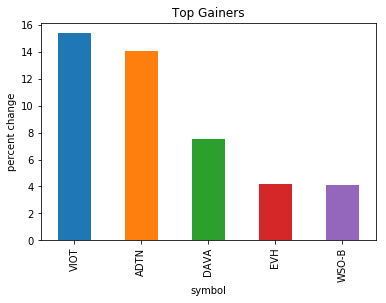

In [20]:
tech_stocks.perc_change.sort_values(ascending=False).head().plot(y= 'perc_change', kind='bar', title= 'Top Gainers')
plt.ylabel('percent change')

Top Losers of the Day:

(0, -30)

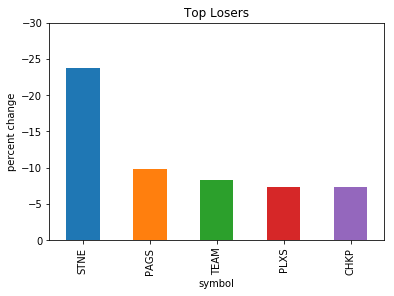

In [21]:
tech_stocks.perc_change.sort_values().head().plot(y= 'perc_change', kind='bar', title= 'Top Losers')
plt.ylabel('percent change')
plt.ylim([0, -30])

Text(0.5, 0, 'Percentage Change')

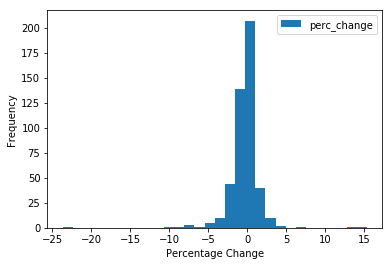

In [49]:
# Distribution of percentage change
tech_stocks.plot(y = 'perc_change', kind = 'hist', bins = 30)
plt.xlabel('Percentage Change')

Except for a few outliers, most of the stocks were in the range -5% to +5%. Plotting in this range:

Text(0.5, 0, 'Percentage Change')

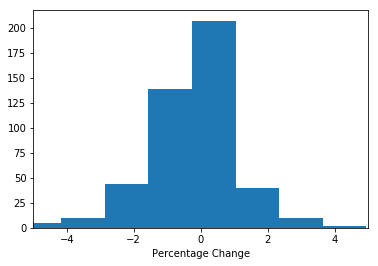

In [50]:
from matplotlib import pyplot as plt
plt.hist(tech_stocks.perc_change, bins = 30)
plt.xlim(-5, +5)
plt.xlabel('Percentage Change')

There is a slight skew to left, showing that even after excluding outliers more stocks had a -ve price change.

In [25]:
# Outliers - Stock having returns more than 3-sigma away from mean
outliers = tech_stocks.perc_change
outliers = tech_stocks[np.abs((outliers - np.mean(outliers)))/np.std(outliers)>3]
print(outliers.shape[0])
outliers

9


name   price  change  perc_change  \
symbol                                                                        
STNE                              StoneCo Ltd.   26.51   -8.23       -23.69   
PAGS                    PagSeguro Digital Ltd.   25.30   -2.73        -9.74   
PLXS                              Plexus Corp.   61.05   -4.86        -7.37   
ADTN                              ADTRAN, Inc.   16.59    2.04        14.02   
VIOT                 Viomi Technology Co., Ltd   15.25    2.03        15.36   
DAVA                                Endava plc   30.00    2.10         7.53   
ARCE                     Arco Platform Limited   30.43   -2.22        -6.80   
CHKP    Check Point Software Technologies Ltd.  119.99   -9.54        -7.37   
TEAM                 Atlassian Corporation Plc  101.94   -9.25        -8.32   

            volume  volume_3_mth_avg    market_cap  pe_ratio  beta_3y_mthly  \
symbol                                                                        
STNE    32482000.0         2961000.0  7.354000e+09    141.01            NaN   
PAGS    13048000.0         2291000.0  8.280000e+09     36.35            NaN   
PLXS      354697.0          164262.0  1.887000e+09     15.36           1.11   
ADTN     2003000.0          365724.0  7.926200e+08       NaN           1.81   
VIOT      563320.0          105412.0  1.056000e+09       NaN            NaN   
DAVA     2021000.0           47641.0  1.487000e+09     71.60            NaN   
ARCE       31007.0           64422.0  1.529000e+09    596.67            NaN   
CHKP     5043000.0          948116.0  1.874400e+10     23.30           0.70   
TEAM     7539000.0         1613000.0  2.441500e+10       NaN           1.63   

        one_yr_target_est  
symbol                     
STNE                33.31  
PAGS                31.31  
PLXS                69.00  
ADTN                15.25  
VIOT                11.23  
DAVA              2446.30  
ARCE                30.87  
CHKP               121.33  
TEAM               116.53

9 stocks were more than 3 standard deviations away from mean for technology stocks.

In [26]:
# Performance statistics of all stocks
tech_stocks.perc_change.describe()

count    467.000000
mean      -0.237345
std        2.165550
min      -23.690000
25%       -0.790000
50%       -0.090000
75%        0.545000
max       15.360000
Name: perc_change, dtype: float64

In [27]:
# Number of stocks having -ve returns
tech_stocks[tech_stocks.perc_change < 0].shape[0]

242

242 out of 467 stocks had -ve price change.

----------

(-5, 5)

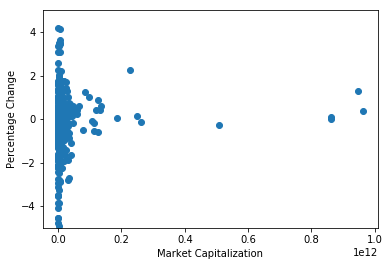

In [28]:
plt.scatter(tech_stocks['market_cap'], tech_stocks['perc_change'])
plt.xlabel('Market Capitalization')
plt.ylabel('Percentage Change')
plt.ylim(-5, +5)

There is no clear link between market capitalization and percentage change. A few stocks have very high market capitalization compared to others; maybe taking log of market capitalization will make the relationship clear.

C:\Users\sd_in\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Percentage Change')

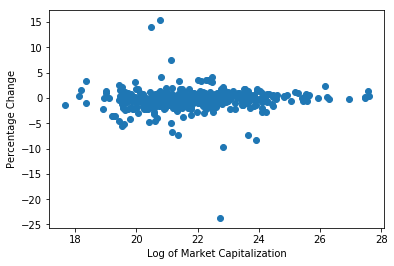

In [29]:
tech_ = tech_stocks[['market_cap', 'perc_change']]
tech_['log_m_cap'] = np.log(tech_['market_cap'])
plt.scatter(tech_['log_m_cap'], tech_['perc_change'])
plt.xlabel('Log of Market Capitalization')
plt.ylabel('Percentage Change')
#plt.ylim(-5, +5)

C:\Users\sd_in\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Percentage Change with Market Cap')

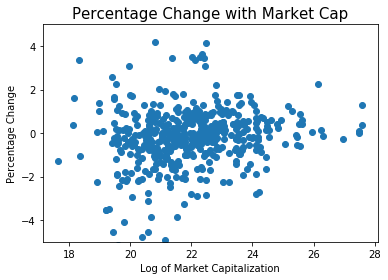

In [30]:
tech_ = tech_stocks[['market_cap', 'perc_change']]
tech_['log_m_cap'] = np.log(tech_['market_cap'])
plt.scatter(tech_['log_m_cap'], tech_['perc_change'])
plt.xlabel('Log of Market Capitalization')
plt.ylabel('Percentage Change')
plt.ylim(-5, +5)
plt.title('Percentage Change with Market Cap', fontsize = 15)

There is no strong link between log of market capitalization and percentage change in price. Though variabilty of price change is slightly higher in low market capitalization stocks.

In [31]:
tech_stocks['mcap_category'] = pd.qcut(tech_stocks['market_cap'], [0, .25, .75, 1.], labels=["low", "medium", "high"])
tech_stocks.head()

name   price  change  perc_change  \
symbol                                                                
AAPL                        Apple Inc.  203.86    0.73         0.36   
TXN     Texas Instruments Incorporated  115.51   -0.09        -0.08   
NVDA                NVIDIA Corporation  186.30   -0.99        -0.53   
ACN                      Accenture plc  178.61   -0.34        -0.19   
CRM               salesforce.com, inc.  155.99    0.65         0.42   

            volume  volume_3_mth_avg    market_cap  pe_ratio  beta_3y_mthly  \
symbol                                                                        
AAPL    24196000.0        28307000.0  9.612570e+11     16.82           0.91   
TXN      4196000.0         5499000.0  1.084200e+11     20.65           1.12   
NVDA     9525000.0        15613000.0  1.133620e+11     28.10           2.37   
ACN      1279000.0         1976000.0  1.139230e+11     25.99           1.14   
CRM      4200000.0         5305000.0  1.208730e+11    109.08           1.05   

        one_yr_target_est mcap_category  
symbol                                   
AAPL               193.12          high  
TXN                109.32          high  
NVDA               183.19          high  
ACN                183.52          high  
CRM                181.63          high

Text(0.5, 1.0, 'Percentage Change for different Market Cap')

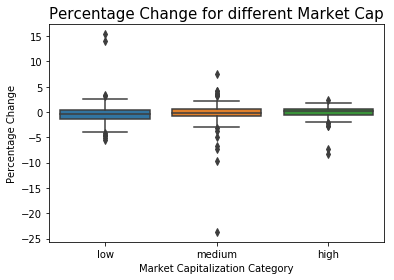

In [32]:
import seaborn as sns
sns.boxplot(x = 'mcap_category', y = 'perc_change', data=tech_stocks)
plt.xlabel('Market Capitalization Category')
plt.ylabel('Percentage Change')
plt.title('Percentage Change for different Market Cap', fontsize = 15)

% loss was higher for some of the higher market capitalization stocks, as compared to low makt cap stocks, which is not a good sign.

### Projected Price Change in One Year
Adding a column on expected price change in a year.

In [33]:
tech_stocks['est_perc_chg_yr'] = (tech_stocks['one_yr_target_est']/tech_stocks['price'] - 1)*100

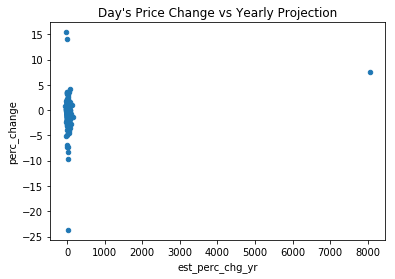

In [34]:
tech_1 = tech_stocks[['perc_change', 'est_perc_chg_yr']]
tech_1.plot(x='est_perc_chg_yr', y='perc_change', kind='scatter', title= "Day's Price Change vs Yearly Projection")

Checking outliers:

In [35]:
outliers_ = tech_stocks[['perc_change', 'est_perc_chg_yr']]
outliers_ = outliers_.loc[outliers_.apply(lambda X: np.abs((X - np.mean(X)))/np.std(X)>3, axis = 0).any(axis = 1)]
outliers_

perc_change  est_perc_chg_yr
symbol                              
STNE         -23.69        25.650698
PAGS          -9.74        23.754941
PLXS          -7.37        13.022113
ADTN          14.02        -8.077155
VIOT          15.36       -26.360656
DAVA           7.53      8054.333333
ARCE          -6.80         1.445942
CHKP          -7.37         1.116760
TEAM          -8.32        14.312341

Endava plc (DAVA) Analyst Opinion (4/22/2019)    
*Source: https://postanalyst.com*         
Endava plc is currently rated as outperform by 5 stock analysts, with the company still having around 2.87% shares outstanding that can be sold short legally. The value of their shares went up by 12.57% last month. Over the course of a year, the stock has grown by 24.22%. Financial analysts are becoming more bullish than ever, with the 2 analysts who cover the activities of DAVA advising investors to buy. Experts on Wall Street have set a price target of $2426.27 for the stock. The decision was arrived after looking at their 7987.57% gain from current levels.

Text(0.5, 0, 'Percent Change estimated in One Year')

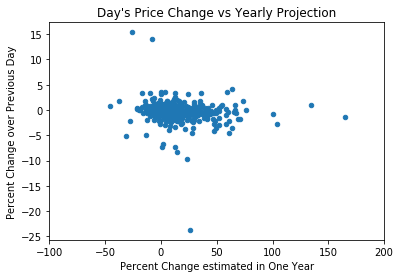

In [36]:
# Limiting x-axis values for better visibility
tech_1.plot(x='est_perc_chg_yr', y='perc_change', kind='scatter', title= "Day's Price Change vs Yearly Projection", xlim = (-100, +200))
plt.ylabel('Percent Change over Previous Day')
plt.xlabel('Percent Change estimated in One Year')

Contrary to expectations the Day's Price Change was not highly linked to Estimated Price in One Year.  
  
Following are some interesting observations:

In [37]:
print("Day's Mean Percent Change for stocks that are expected to gain more than 50% in one year:", round(tech_1[tech_1.est_perc_chg_yr > 50].perc_change.mean(), 2))
print("Day's Mean Percent Change for stocks that are expected to 0% to 50% gain in one year:", round(tech_1[(tech_1.est_perc_chg_yr >= 0) & (tech_1.est_perc_chg_yr <= 50)].perc_change.mean(), 2))
print("Day's Mean Percent Change for stocks that are expected to lose in one year:", round(tech_1[tech_1.est_perc_chg_yr < 0].perc_change.mean(), 2))

Day's Mean Percent Change for stocks that are expected to gain more than 50% in one year: -0.26
Day's Mean Percent Change for stocks that are expected to 0% to 50% gain in one year: -0.44
Day's Mean Percent Change for stocks that are expected to lose in one year: 0.32


### Price Change vs Beta (systematic risk)

In [38]:
tech_beta = tech_stocks[['perc_change', 'beta_3y_mthly']]
tech_beta.dropna(axis= 0, how = 'any')

perc_change  beta_3y_mthly
symbol                            
AAPL           0.36           0.91
TXN           -0.08           1.12
NVDA          -0.53           2.37
ACN           -0.19           1.14
CRM            0.42           1.05
IBM            0.88           1.68
AVGO          -0.60           0.27
ADBE           0.42           1.03
SAP            0.59           0.86
ORCL           0.07           1.04
TSM            2.28           0.87
CSCO           0.16           1.06
PAYC           1.08           1.66
MINDP         -1.29           2.19
SOHU           0.79           1.14
PRO            0.14           0.77
JCOM          -0.55           0.92
SAIC           0.81           1.11
CYBR          -2.91           1.17
LITE           1.01           0.92
CACI           0.02           1.31
SINA           0.57           1.30
PCTY          -2.13           1.52
NUAN          -0.30           1.63
MDSO           3.49           1.20
JBL            0.84           0.48
INXN          -0.72           1.21
LFUS           0.18           1.00
COMM          -1.55           1.50
BB             0.00           2.09
...             ...            ...
HPQ            0.10           1.20
RHT           -0.34          -0.29
NOK           -0.17          -0.06
ERIC          -2.69           0.28
XLNX          -0.64           1.41
ATVI           0.73           0.79
NTES          -0.85           0.32
ADSK           0.70           1.43
CTSH          -1.12           1.05
WDAY          -1.67           1.15
AMAT           0.14           1.50
ADI            0.34           1.31
NOW            0.50           0.97
INFY          -0.19           0.85
MU             0.58           1.48
BIDU           0.41           1.13
SNE            0.25           0.95
INTU           0.59           1.04
VMW           -0.52           0.87
ASML           1.25           1.32
QCOM           1.02           0.92
INTC          -0.12           0.49
FB            -0.28           1.20
GOOG           0.00           1.16
GOOGL          0.11           1.19
MSFT           1.31           1.01
STM           -0.32           1.55
TECD          -0.19           1.16
GWRE           0.15           1.10
FLEX           0.00           2.26

[412 rows x 2 columns]

Text(0.5, 1.0, 'Price Change vs Beta')

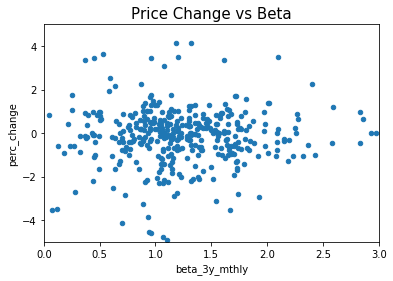

In [39]:
tech_beta.plot(x = 'beta_3y_mthly', y = 'perc_change', kind = 'scatter', ylim = (-5, +5), xlim = (0, 3))
plt.title('Price Change vs Beta', fontsize = 15)

From the graph the day's price change was not related to beta. This also shows that the loss might be more sustained.

### Stock Prices for Different PE Ratios

In [51]:
tech_pe = tech_stocks[['price', 'pe_ratio', 'perc_change']].dropna(axis = 0, how = 'any')

(0, 400)

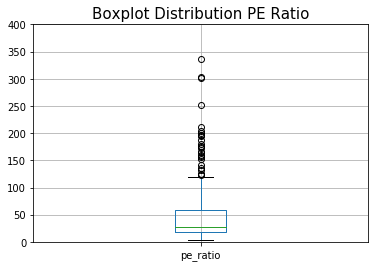

In [52]:
tech_pe.boxplot(column = 'pe_ratio')
plt.title('Boxplot Distribution PE Ratio', fontsize = 15)
plt.ylim(0, 400)

In [53]:
print('Mean PE Ratio:', np.mean(tech_pe.pe_ratio))
print('Median PE Ratio:', np.median(tech_pe.pe_ratio))

Mean PE Ratio: 63.04630434782611
Median PE Ratio: 28.055


In [54]:
tech_pe['pe_ratio_quartile'] = pd.qcut(tech_pe['pe_ratio'], [0, .25, .50, .75, 1.], labels=["Q1", "Q2", "Q3", "Q4"])

In [64]:
tech_pe.groupby('pe_ratio_quartile').pe_ratio.agg(['min', 'max', 'mean'])

min     max        mean
pe_ratio_quartile                           
Q1                  3.96   17.49   12.387407
Q2                 17.51   28.02   22.736250
Q3                 28.09   58.97   40.519375
Q4                 59.11  953.75  175.766420

Text(0, 0.5, 'Price')

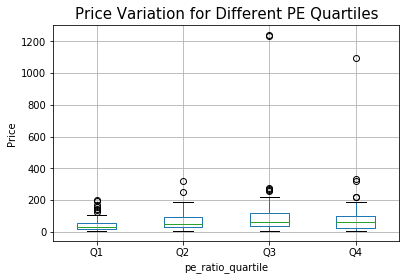

In [56]:
tech_pe.boxplot(column = 'price', by = 'pe_ratio_quartile')
plt.title('Price Variation for Different PE Quartiles', fontsize = 15)
plt.suptitle("")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

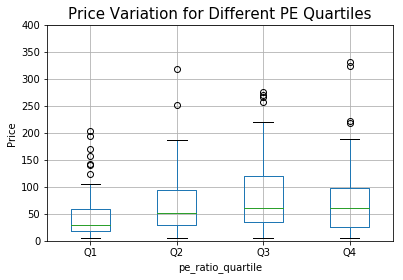

In [57]:
tech_pe.boxplot(column = 'price', by = 'pe_ratio_quartile')
plt.title('Price Variation for Different PE Quartiles', fontsize = 15)
plt.suptitle("")
plt.ylim(0, 400)
plt.ylabel('Price')

Stocks in the bottom quartile by pe_ratio are priced lower, but in other quartiles there is not much difference.

Text(0, 0.5, 'Percentage Price Change')

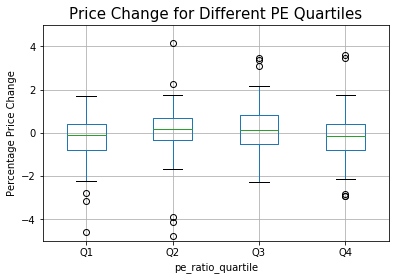

In [60]:
tech_pe.boxplot(column = 'perc_change', by = 'pe_ratio_quartile')
plt.title('Price Change for Different PE Quartiles', fontsize = 15)
plt.suptitle("")
plt.ylim(-5, +5)
plt.ylabel('Percentage Price Change')

Percentage price change was not linked to the PE ratio.